## Identifying Fraud from the Enron Dataset
 by Shaswati Ghosh on March 7, 2018

                    
### Introduction

In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. All of their nonexistent profits were made through a method called "mark-to-market" accounting. They used to report profits even though they were not earning a single dime. This company was responsible for the California electricity crisis. In the resulting Federal investigation, a significant amount of typically confidential information entered into the public record, including tens of thousands of emails and detailed financial data for top executives. 

The goal of this project is to build an identifier based on characteristics of employees to find if they are person of interest ("POI") or not using the financial and email data made available after Enron's scandal. Using different resources, list of persons of interest in the fraud case has been made. These persons are those individuals who were indicted, reached a settlement or plea deal with the government, or testified in exchange for prosecution immunity.

Application of machine learning in this project might be helpful if we take the predictions from the Enron data model and apply them to any other similar circumstances.

### 1.Data exploration:

The dataset is containing 146 records. Each records are having 21 features. 6 features are related to e-mail, 14 are financial features and one POI label.

There are many NULL values in data set. Below diagram displays the percentage of missing values for each feature. Five features i.e. 'director_fees', 'deferred_income', 'restricted_stock_deferred', 'loan_advances' and 'deferral_payments' are having 60% of NULL values.

Overall, there are 18 POIs in the dataset and labelled accordingly.

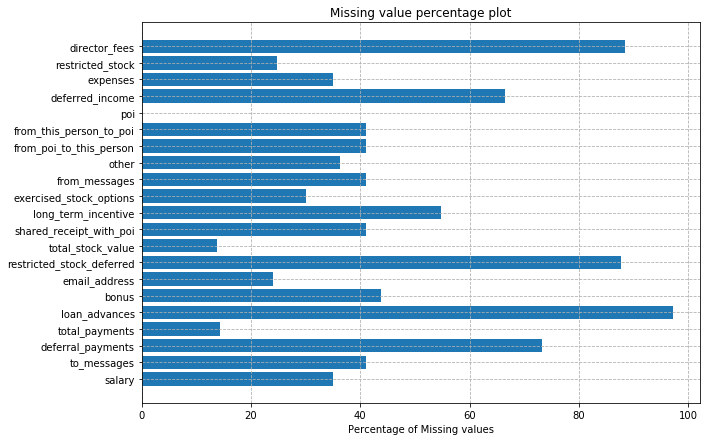

In [1]:
from IPython.display import Image
Image(filename='Missing value plot.png')

### 2.  Outlier investigation and Data correction:

One biggest outlier was 'Total', which was having sum of all the records in each numeric features. Other than this one, another two records were found which can be avoided for further analysis. Below three records are removed.
- Total : Having sum of all the other records
* Lockhart Eugene E : Having NULL values for all features and marked as non-poi
+ The Travel Agency in the Park : This can be an input error, this one is having just 2 non-null features. 

After thorough checking of the file enron61702insiderpay.pdf, it was clear that 'total_payment' is summation of other payment features('salary', 'bonus', 'long_term_incentive', 'deferred_income', 'deferral_payments', 'loan_advances', 'other' 'expenses', 'director_fees'). Similarly, 'total_stock_value' is summation of other stock related features('exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred'). Based on this, tried to find out if there is any mismatch. And below two records were found.
* BELFER ROBERT
* BHATNAGAR SANJAY

Later on correct values are loaded in data_set before processing.

### 3. Feature Selection and adding new features:

Features | Score | Frequency
:-----------------|:------------------:|---------------:
'total_stock_value' | 22.510547339827955 | 125
'exercised_stock_options' | 22.348972666142437 | 100
'bonus' | 20.792252047181535 | 81
'salary' | 18.289684043404513 | 94
'deferred_income' | 11.424891485418364 | 49
'long_term_incentive' | 9.9221860131898225 | 65
'total_payments' | 9.2838736184273731 | 123
'restricted_stock' | 8.8254422199164626 | 110
'shared_receipt_with_poi' | 8.6521673869450275 | 86
'loan_advances' | 7.1840556582887247 | 3
'expenses' | 5.4189001894070357 | 96
'from_poi_to_this_person' | 5.2434497133749582 | 86

The above table shows the top twelve features selected by using scikit-learn's SelectKBest algorithm. Frequency is not directly related to the score of any features. SelectKBest algorithm gives idea about best features, but does not optimize it always.

Normal understanding says that email communication between POI should be more than others. So email feature might have some important role in determining POI. But only two email features are present in the list. 

If we go through the data, we can find that, some records being 'poi' as TRUE, are having email count 'from_poi_to_this_person' less than that of non-poi person. So the ratio of received message from poi to total received message can be a better figure to understand the relation. So two new feature can be created from this email counts. Below two features has been created.
* fraction_to_poi = 'from_this_person_to_poi' / 'from_messages'
* fraction_from_poi = 'from_poi_to_this_person' / 'to_messages'

After including these two new features, SelectKBest algorithm is again used to find the score of features.

Features | Score | 
:-----------------|:------------------:
'total_stock_value' | 22.51 
'exercised_stock_options' | 22.35
'bonus' | 20.79
'salary' | 18.289
'fraction_to_poi' | 16.44
'deferred_income' | 11.42
'long_term_incentive' | 9.92 
'total_payments' | 9.28
'restricted_stock' | 8.83
'shared_receipt_with_poi' | 8.65 
'loan_advances' | 7.18
'expenses' | 5.42

'fraction_to_poi' made entry to the list and came up as 5th best feature. The above list is the final feature list.

The features are having very different value ranges. So scaling of feature is required to achieve a better result. MinMaxScaler has been used before running under various classification algorithms. This has beed done using the Pipeline. 

### 4. Alogorithm selection and Tuning of algorithm:

Three different algorithms i.e. GaussianNB, DecisionTreeClassifier and LogisticRegression were used and their results were  analysed. Finally Logistic regression has been used due to its better performance.

The outcome of an algorithm can be altered by changing the parameters value. The idea is to tune the parameters of the algorithm to obtain better results. To obtain a better result, GridSearchCV and Pipeline are used on all the three classifiers. We can get the best results using clf.best_estimator_ and clf.best_params_, which is outcome of GridSearchCV.

Which parameters to add for each algorithms are decided by checking with different parameters. This testing is done in 'selectFeatures_tuneClassifier.py' and 'selectFeatures_tuneClassifier_StratifiedShuffleSplit.py'.  

##### Effect of parameter tuning:
Parameter tuning can affect the result a lot. If the parameters are not tuned well, it can give very bad results. below is a table for test result with tuning and without tuning for `logistic regression` with 12 best features.

Tuning | Recall | Precision | Accuracy | Classifier Parameter
:-----------------|:------------------:|:------------------:|:--------------------:|:---------------
Without | 0.31 |0.62 | 0.085  | LogisticRegression(C=1.0, class_weight=None, tol=0.0001)
With  | 0.40 | 0.82 | 0.69  | LogisticRegression(C=10^9, class_weight='balanced', tol=0.0001)

We can see the huge change in `Recall` rate value, which is the most important metrics in our case. And oher two metrics are also showing better result as per the requirement of our data set, where accuracy is not important parameter at all. The variation of `'C'` and `'tol'` has bring this improvement. Parameter choosing was done initially by manual change of one by one, then finally done using pipeline.

If we don't do proper tuning of parameter, choosing of right algorithm can be misleading. Below is a table showing the result of three parameters without any tuning with 12 best features. 

Metrics | GaussianNB | Decision Tree | Logistic Regression 
:-----------------|:------------------:|:------------------:|:--------------------:
Recall | 0.31 |0.28 | 0.085  
Precision  | 0.32 | 0.29 | 0.62  
Accuracy | 0.82 | 0.81 | 0.87

According to this result, `'logistic regression'` is a very bad performer. But when we tuned the parameters correctly, we can see that this one is the best performer than other two. Other two algorithms also show better result with tuning. Logistic regression came up as the best performer after proper parameter choosing and tuning of them.

But more tuning makes the algorithm more biased to training data and this can lead to a fragile models & overfit the test harness but don't perform well in practice. So tuning need to be optimized as well. For final tuning process I have used the GridSearchCV to find the best estimator. 

##### Final tuning metrics

Below are metrics comparison in selecting the feature count of tuning process. Each metric is the result of 10 iterations and the mean has been shown as the final values and data set was splitted using 1000 fold of 'StratifiedShuffleSplit'.

* Best 3 features after adding the new features:

Metrics | GaussianNB | Decision Tree | Logistic Regression
:-----------------|:------------------:|:------------------:|:----------------:
Recall | 0.33 | 0.06 | 0.39
Precision | 0.49 | 0.14 | 0.29
Accuracy | 0.844 | 0.79 | 0.75


* Best 12 features after adding the new features:

Metrics | GaussianNB | Decision Tree | Logistic Regression
:-----------------|:------------------:|:------------------:|:----------------:
Recall | 0.31 | 0.49 | 0.551
Precision | 0.32 | 0.38 | 0.282
Accuracy | 0.82 | 0.82 | 0.75

We can see the improvement of performance when we increase the features count from 3 to 12. Our final selection for feature count is 12.

Below are few more metrics of tuning process. Each metric is the result of 50 iterations and the mean has been shown as the final values and data set was splitted using 'train_test_split'.

* With original 21 features:

Metrics | GaussianNB | Decision Tree | Logistic Regression
:-----------------|:------------------:|:------------------:|:----------------:
Recall | 0.57 | 0 | 0.428
Precision | 0.12 | 0 | 0.33
Accuracy | 0.30 | 0.697 | 0.767

* Best 12 features selected by SelectKBest from original features :

Metrics | GaussianNB | Decision Tree | Logistic Regression
:-----------------|:------------------:|:------------------:|:----------------:
Recall | 0.42 | 0.285 | 0.57
Precision | 0.076 | 1 | 0.285
Accuracy | 0.069 | 0.88 | 0.696

* Best 12 features after adding the new features:

Metrics | GaussianNB | Decision Tree | Logistic Regression
:-----------------|:------------------:|:------------------:|:----------------:
Recall | 0.5 | 0.37 | 0.75
Precision | 0.111 | 0.6 | 0.4
Accuracy | 0.162 | 0.837 | 0.744


For `logistic regression` **Recall** rate has increased gradually and is showing much better results compared to other two algorithms. In our case, RECALL rate is more important than that of precision and accuracy. Goal is to identify most of POI persons. Even if someone is wrongly picked, later investigation can make them free of charge. But none(in reality as less as possible) of true POI should be falsely made as non-POI. The tuning is done to achieve best RECALL rate with some optimum compromise on PRECISION and ACCURACY value. 


Hence, `logistic regression` was chosen as the final classifier with parameters found from GridSearchCV as below.

LogisticRegression(C=10^9, class_weight='balanced', random_state=42, tol=1e-05)


### 5. Validation of selected algorithm:

Validation of any model is very important to make sure the model generalizes with the remaining part of the dataset. Most common mistakes can be done during modelling are over-fitting and under-fitting of data. High bias relates to underfitting the data and high variance relates to overfitting it. Over-fitting of data can lead to a very good performance on training data set but poor performance on test set. 

I validated my analysis by first splitting 10% of data set to test set and then 30% of data set to test set. The second one gives better result. As our data set is very small and it is having very less number of POI(only 14). So 105 of small test set might have no POI at all, which leads to poor results compared to spilt of 30%. 

I have used `'train_test_split div'` for my thorough analysis and finding the best algorithm. Then I checked the result using 
`'test_classifier'` of given script `'tester.py'`. In this function `'StratifiedShuffleSplit'` has been used to split the data set to training and test set. The later result shows the same trend with other parameters and feature change, but the `Recall` value is lower value, which seems more accurate as the data was splitted 1000 folds by StratifiedShuffleSplit. Stratified split means that the very similar percentage of POIs is included for each test set created as in the entire set. So use of this method improves the validation process.

### 6. Evaluation of results:

The metrics used to evaluate the performance of the algorithm are `Recall`, `Precision` and `Accuracy`.

In our case *Recall* and *Precision* are better than *Accuracy* to evaluate the performance because of the content of the dataset. Goal is to identify most of POI persons. Even if someone is wrongly picked, later investigation can make them free of charge. But none(in reality as less as possible) of true POI should be falsely made as non-poi. So having a `good RECALL` and a `low PRECISION` is ideal. 

`Accuracy` is not a good metric here because the ration of POI to non-POI is very less. Only 18 true POIs are there in our data set of 143(after outlier removal) records. So even if we predict every one as non-POI, then also our `Accuarcy` will be high as 87.41%, which is a really good value. But `Recall` and `Precision` both will be 0 then. So `Accuracy` is not at all a good metric for our case.

Metrics | Value | 
:-----------------|------------------:|
Recall score | 0.75
Precision score |  0.4
Accuracy score | 0.744

As shown above, the three evaluation metrics I used were recall, precision, and accuracy. This result is from using splitting method `train_test_split`. The values of precision and recall means that a 75% of the real POIs are detected and a 40% of the detected POIs are really true.

Below table shows the metrics value found using the provided fundtion `'test_classifier'` of script `'tester.py'`, which uses a `StratifiedShuffleSplit`.

Metrics | Value | 
:-----------------|:------------------:|
Recall| 0.612
Precision| 0.313
Accuracy| 0.769

The `Recall` rate from `StratifiedShuffleSplit` are lower than that of `train_test_split`, because stratified splits is more accurate than just randomly splitting the data set. This gives a more reality check on results.


### 7. Conclusion:

This project was very helpful to learn the use of different machine learning algorithms, their tuning and performance improvisation. Overall it was challenging and good time investment is required to achieve a better result. Many other algorithms can be tried with and their parameter tuning can give better solution. Few restrictions are like small dataset, missing values. As we can see that email features have important role to identify POI, so including much more email details can help to make it better. As an example, in some cases, personal assitants can write email on behalf of top executives. Data preparation will be a difficult to consider this scenario. If we can explore more on data and other algorithms, more accurate model can be achieved.

In [2]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

In [3]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')